<a href="https://colab.research.google.com/github/asoushawk/redditinterest/blob/main/Reddit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install praw

import praw
import random
from praw.models import MoreComments
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt


reddit = praw.Reddit(
     client_id="A4pjgLj-HChYmA",
     client_secret="-SPf5aNyRtqnrCDxW9cEHULT9u0",
     user_agent="my user agent", check_for_async=False)

**Coleta de usernames no subreddit, nos comentários em publicações**

In [77]:
#Função para limpar o console
def clear(): 
  
    import os
    os.system('cls' if os.name == 'nt' else 'clear')

#Coleta nome de usuários
sub = "samsung"
authors = list()


def getauthors():
  for submission in reddit.subreddit(sub).hot(limit=7): #limit=quantia de publicações
    print(submission.title)
    for post in submission.comments.list():
      try:
        redditorname = post.author
        yield str(redditorname)
      
      except Exception as e:
        pass  

for author in getauthors():
  authors.append(author)



The State of this Sub
Should I switch from an iPhone XS to a Galaxy S21 Ultra?
Is it Crazy to switch from Note20U to the S21?
Switching from iPhone to Note 20
Which s20 fe color should I get? I'm torn!
Smarten up Samsung Week
Samsung/snapchat issue. Videos recorded and downloaded from snapchat now develop compression and pixelation at the "seam" between 2 clips when trimmed.


**Remoção de usuários duplicados**

In [79]:
def remov_duplicates():
   fhandle2 = open("authors1.txt", "w")
   st = authors
   for i in range(0, len(st)):
      st[i] = "".join(st[i])
      dupli = Counter(st)
      s = " ".join(dupli.keys())
      fhandle2.write(s)
      fhandle2.write(" ")
     
clear()
print ("removendo usuários duplicados...")      
remov_duplicates()
print("done")


removendo usuários duplicados...
done


**Leitura dos Users**

In [80]:
fhandle = open("authors1.txt", "r")
f_read = fhandle.read()
stripped = f_read.split(" ")

#função que retorna os autores
def getitem(stripped):
  for item in stripped:
    if item != "":  
      yield item


for itemm in getitem(stripped):
  authors.append(itemm)

random.shuffle(authors)  

**Lista com subreddits comuns a se evitar**

In [81]:
commonsubs = ['askreddit', 'news', 'funny', 'memes', 'aww', 'politics']

**Scraping dos perfis e contagem de subs**

In [83]:
a = 1
final = list()
added_subs = list()
def comments(a, added_subs):
  v = 0
  added_subs = []
  for comment in reddit.redditor(authors[a]).comments.new(limit=20):
    sub = comment.subreddit
    sub = str(sub)
    if v > 10:
      break
    if sub not in added_subs and sub not in commonsubs:
      added_subs.append(sub)
      final.append(sub)
      v = v + 1


for _ in range(200):
  counts = Counter(final)
  print("Usuários:", a)
  print(counts)
  a = a + 1
  
  comments(a, added_subs)
  clear()

 

Usuários: 1
Counter()
Usuários: 2
Counter({'wildrift': 1, 'MobileLegendsGame': 1, 'samsung': 1, 'arenaofvalor': 1, 'vainglorygame': 1, 'Twitch': 1})
Usuários: 3
Counter({'samsung': 2, 'wildrift': 1, 'MobileLegendsGame': 1, 'arenaofvalor': 1, 'vainglorygame': 1, 'Twitch': 1, 'lawnmowers': 1, 'Futurology': 1, 'ATT': 1, 'science': 1})
Usuários: 4
Counter({'samsung': 2, 'wildrift': 1, 'MobileLegendsGame': 1, 'arenaofvalor': 1, 'vainglorygame': 1, 'Twitch': 1, 'lawnmowers': 1, 'Futurology': 1, 'ATT': 1, 'science': 1, '3d6': 1, 'dndnext': 1, 'magic_survival': 1, 'ATLAverse': 1, 'idleslayer': 1, 'dndmemes': 1, 'TheLastAirbender': 1})
Usuários: 5
Counter({'samsung': 3, 'wildrift': 1, 'MobileLegendsGame': 1, 'arenaofvalor': 1, 'vainglorygame': 1, 'Twitch': 1, 'lawnmowers': 1, 'Futurology': 1, 'ATT': 1, 'science': 1, '3d6': 1, 'dndnext': 1, 'magic_survival': 1, 'ATLAverse': 1, 'idleslayer': 1, 'dndmemes': 1, 'TheLastAirbender': 1, 'movies': 1, 'PublicFreakout': 1, 'Reno': 1, 'FedEx': 1, 'legalad

In [84]:
counts = Counter(final) 
mostcommon = [mc for mc,cnt in counts.most_common(15)]
result = pd.DataFrame(mostcommon,columns=['subs'])
result1 = pd.DataFrame(counts, columns=['subs'])

In [85]:
a = 1
percentages = []
frequencies = []
for _ in range(14):
  
  frequency = int(counts[mostcommon[a]])
  frequency = int(frequency)
  percentage = (frequency / 200) * 100
  a = a + 1
  percentages.append(percentage)
  frequencies.append(frequency)

percentage =  [
               (mostcommon[0], frequencies[0], percentages[0]),
               (mostcommon[1], frequencies[1], percentages[1]),
               (mostcommon[2], frequencies[2], percentages[2]),
               (mostcommon[3], frequencies[3], percentages[3]),
               (mostcommon[4], frequencies[4], percentages[4]),
               (mostcommon[5], frequencies[5], percentages[5]),
               (mostcommon[6], frequencies[6], percentages[6]),
               (mostcommon[7], frequencies[7], percentages[7]),
               (mostcommon[8], frequencies[8], percentages[8]),
               (mostcommon[9], frequencies[9], percentages[9]),
               (mostcommon[10], frequencies[10], percentages[10])]
    

            




In [86]:
percentagedf = pd.DataFrame(percentage)
percentagedf[1] = percentagedf[1].astype(float)
percentagedf[2] = percentagedf[2].astype(float)
percentagedf.columns = ['sub', 'frequency', '%']
percentagedf

,sub,frequency,%
0,samsung,35.0,17.5
1,Android,23.0,11.5
2,AskReddit,20.0,10.0
3,iphone,16.0,8.0
4,galaxys10,15.0,7.5
5,oneplus,14.0,7.0
6,androidapps,14.0,7.0
7,galaxynote10,11.0,5.5
8,PublicFreakout,11.0,5.5
9,GalaxyS21,11.0,5.5


Subreddits mais populares entre usuários do /r/samsung:

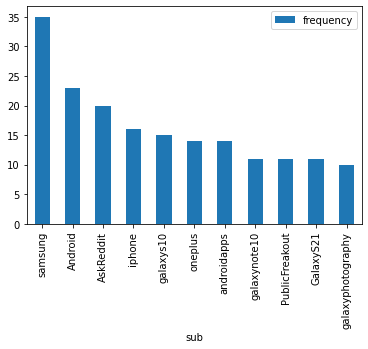

In [87]:
percentagedf.plot(
    x = 0, y = 1, kind = 'bar'
)

In [88]:
print(result)

                 subs
0             samsung
1             Android
2           AskReddit
3              iphone
4           galaxys10
5             oneplus
6         androidapps
7        galaxynote10
8      PublicFreakout
9           GalaxyS21
10  galaxyphotography
11        GooglePixel
12       IdiotsInCars
13  interestingasfuck
14            tmobile
